### Dharavath_Ramdas
linkedin link: https://www.linkedin.com/in/dharavath-ramdas-a283aa213/

# Image Classification
## ANN Practical Implementation on MNIST Handwritten Image Data-Set
    1. ANN Practical implementation
    2. Accuracy, Loss, Val_accuracy, Val_loss
    3. Hyperparameter tuning using keras tuner
    4. Dataset: mnist=tf.keras.datasets.mnist

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [ ]:
# mnist data set 

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
# loding mnist dataset
# spliting dataset into train and test

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Checking Shape of mnist train dataset 

In [7]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [8]:
# checking shape of mnist test dataset

In [9]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
# Checking the particular row (single row)

In [10]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# using imshow to see image 

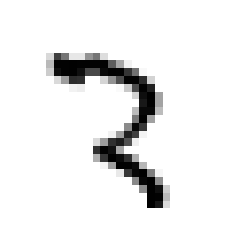

In [11]:
plt.imshow(X_train_full[500],cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
# Checking 0 to 255 

<AxesSubplot:>

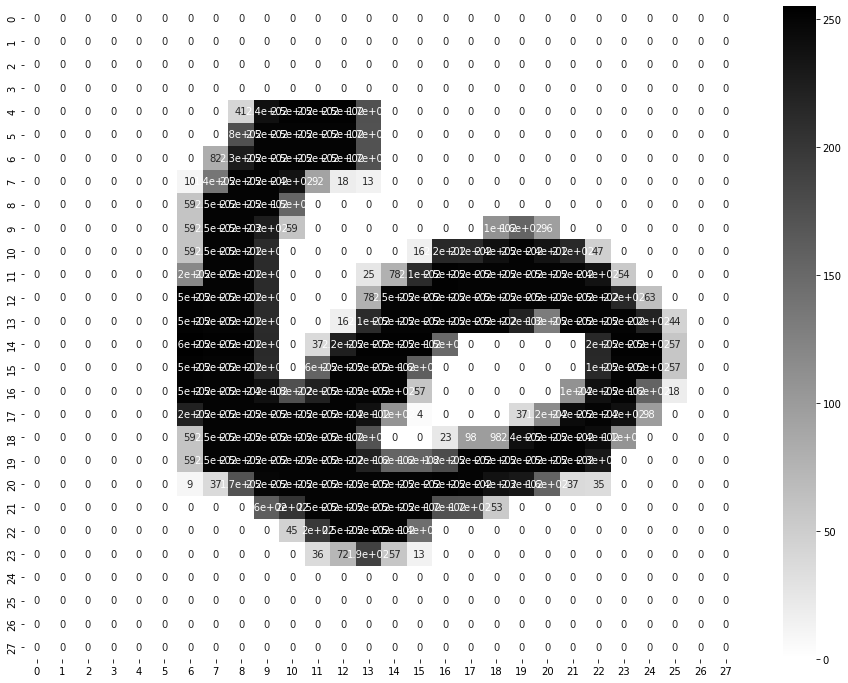

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train_full[9000],annot=True,cmap='binary')

In [14]:
# scale the data between 0 to 1 by dividing it by 255 . as it's an unsigned data between 0 to 255 range
# validation taking 5000 , training 55000

In [15]:
X_valid,  X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [16]:
X_test = X_test/255

In [17]:
X_valid.shape,X_train.shape, y_valid.shape, y_train.shape, X_test.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,), (10000, 28, 28))

<AxesSubplot:>

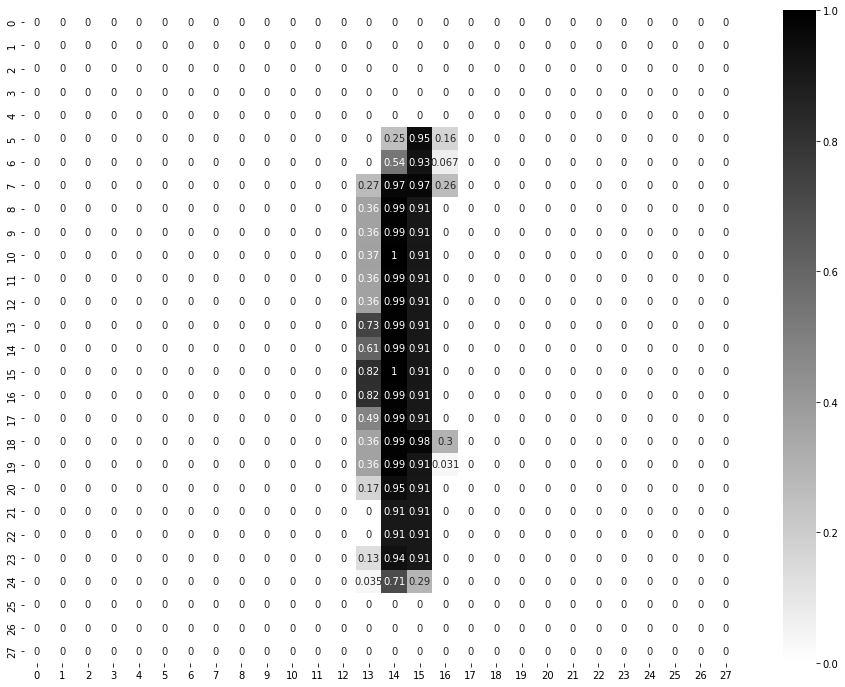

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train[9000],annot=True,cmap='binary')

<AxesSubplot:>

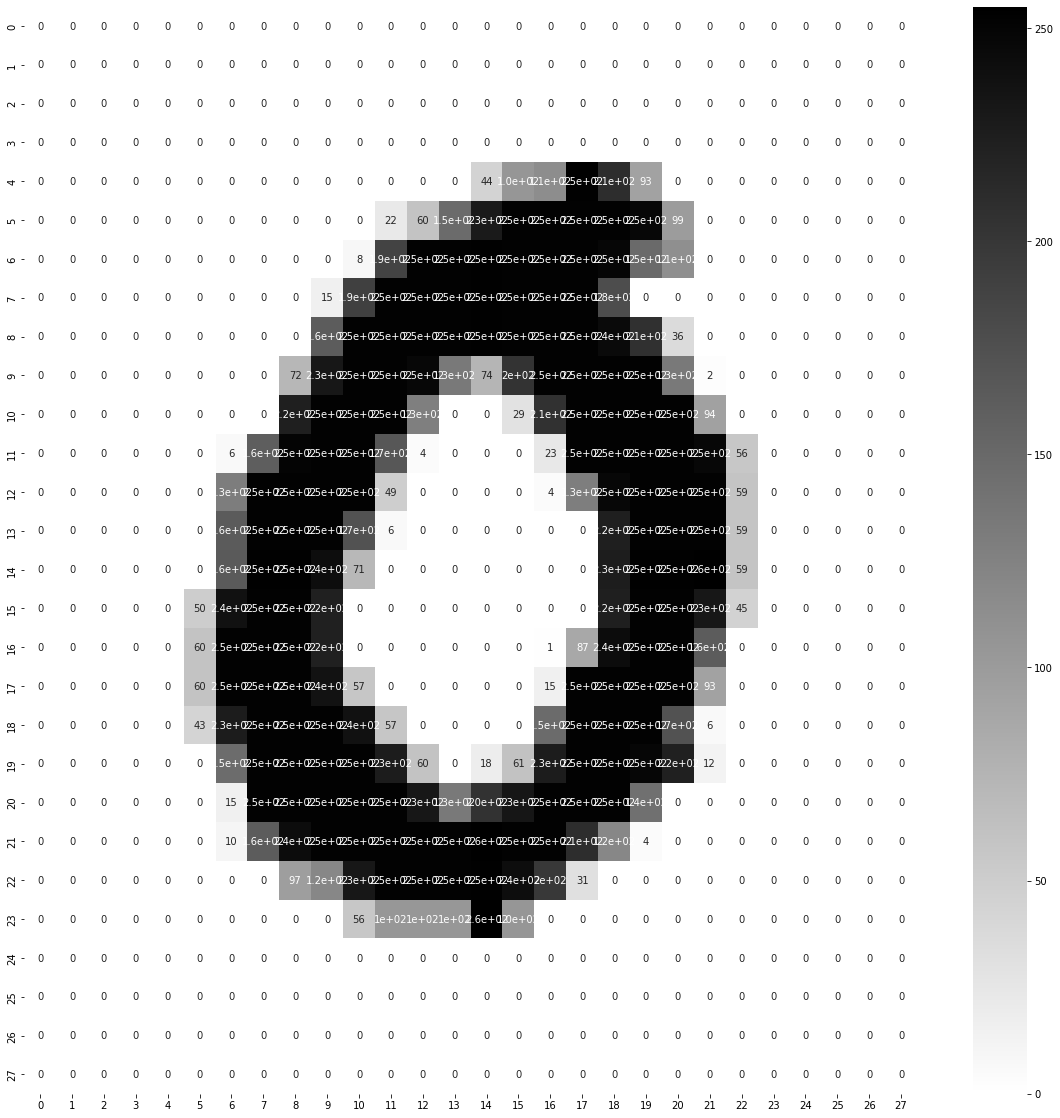

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[8000],annot=True,cmap='binary')

<AxesSubplot:>

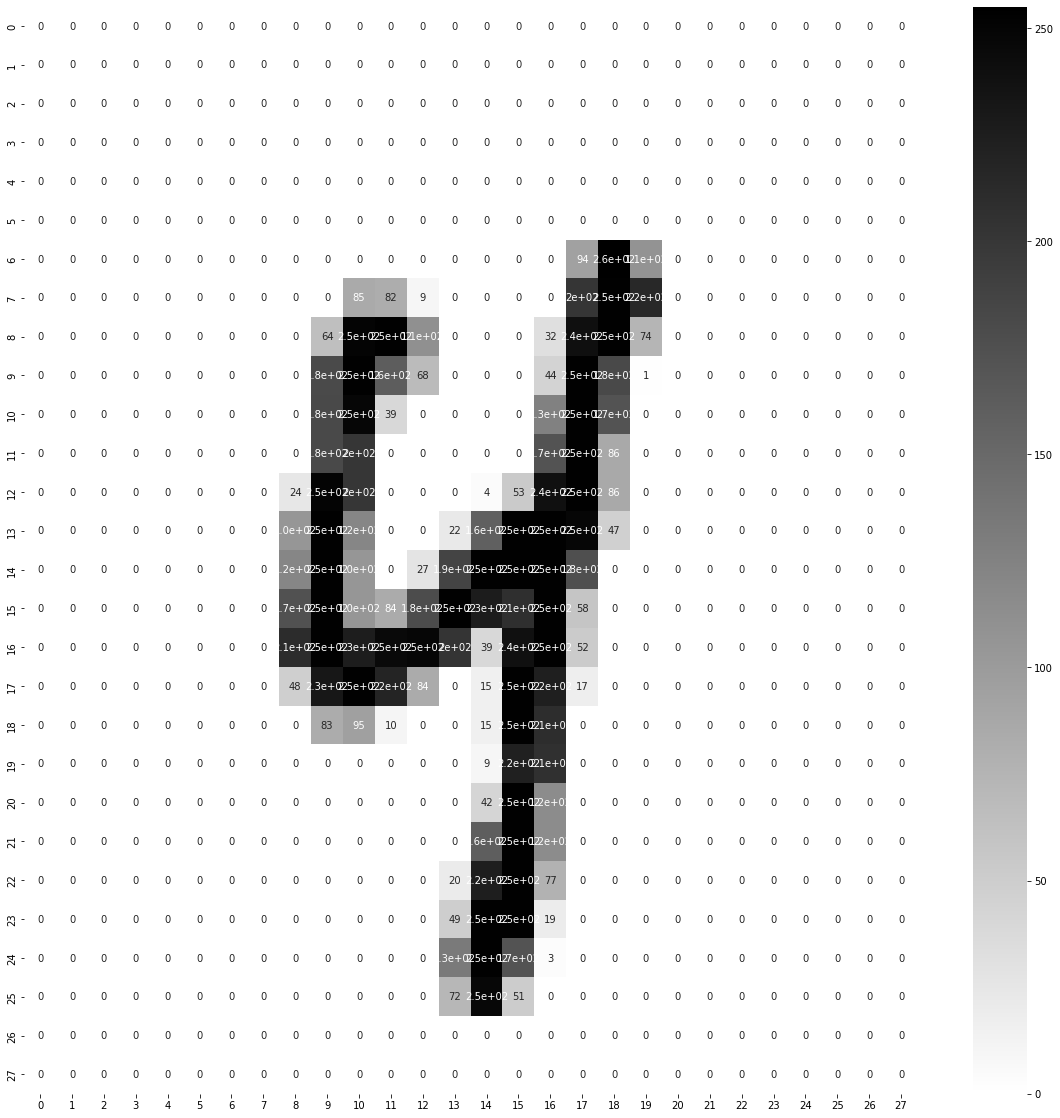

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[2222],annot=True,cmap='binary')

In [ ]:
# image dimentions 28*28

In [22]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
          tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
          tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")
          ]

In [23]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]


In [38]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer = OPTIMIZER,metrics=METRICS)

In [39]:
model_clf.layers

In [40]:
model_clf.layers[1].name

'hiddenlayer1'

In [41]:
hidden1=model_clf.layers[1]

In [42]:
weights,biases = hidden1.get_weights()

In [43]:
weights

array([[ 0.03357095,  0.01810801,  0.00199503, ..., -0.01732   ,
         0.01089735, -0.03457171],
       [ 0.04422311,  0.06708393,  0.02935505, ...,  0.04892937,
         0.06063911, -0.05329031],
       [-0.04553149, -0.04341061,  0.02577771, ..., -0.00485258,
        -0.06393808,  0.05180311],
       ...,
       [ 0.05515622,  0.0244756 ,  0.00017202, ...,  0.00082552,
        -0.0119606 ,  0.04997302],
       [-0.04660275, -0.01013608,  0.00185366, ..., -0.06737908,
        -0.02143198, -0.03630887],
       [ 0.02377255, -0.05727337, -0.0685782 , ...,  0.03276511,
         0.03054526,  0.00674994]], dtype=float32)

In [44]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs = EPOCHS, validation_data=VALIDATION_SET)


Epoch 1/5
1719/1719 [==============================] - 12s 4ms/step - loss: 0.2139 - accuracy: 0.9361 - val_loss: 0.1044 - val_accuracy: 0.9686
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9731 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.0980 - val_accuracy: 0.9680
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.0749 - val_accuracy: 0.9786
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.0691 - val_accuracy: 0.9800


In [46]:
import time
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
    os.makedirs(model_dir,exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [47]:
model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_02_25_09_22_40_.h5


In [48]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.213928,0.936055,0.104353,0.9686
1,0.086649,0.973055,0.083957,0.9750
2,0.060201,0.980400,0.098008,0.9680
3,0.044365,0.985709,0.074886,0.9786
4,0.036034,0.987873,0.069104,0.9800


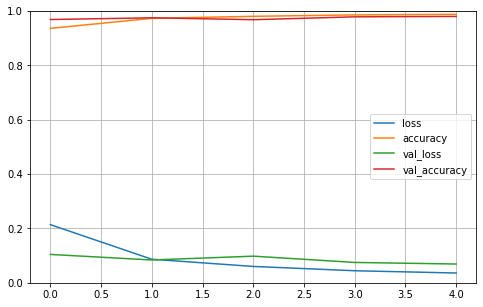

In [50]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [51]:
model_clf.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0767 - accuracy: 0.9783


0.9782999753952026

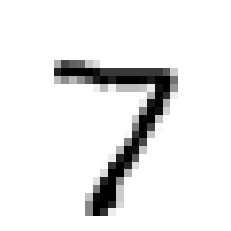

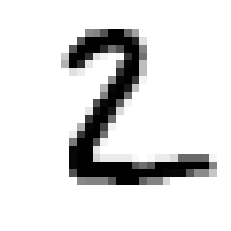

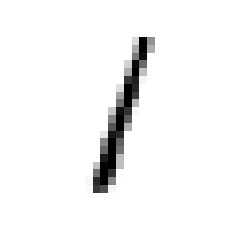

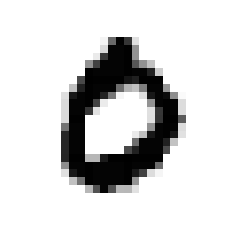

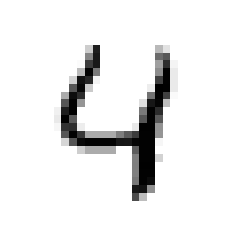

In [52]:
for i in range(0,5):
  plt.imshow(X_test[i],cmap="binary")
  plt.axis("off")
  plt.show()

In [53]:
prediction = model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 141ms/step


In [54]:
prediction

array([[3.1655862e-09, 1.7929136e-08, 1.0028300e-07, 6.6170655e-06,
        2.7604191e-10, 4.1312724e-08, 1.3972336e-12, 9.9998379e-01,
        3.3480754e-07, 9.0433359e-06],
       [1.1071189e-06, 1.6328986e-04, 9.9983537e-01, 1.2583962e-07,
        1.1674254e-13, 5.3227192e-09, 2.8613686e-10, 2.5197473e-09,
        6.4555223e-08, 3.3037977e-13],
       [8.4075236e-07, 9.9976367e-01, 6.1525076e-05, 1.0932925e-07,
        1.5752168e-05, 1.2382726e-06, 7.6882145e-07, 1.3393046e-04,
        2.2096998e-05, 4.2825221e-08]], dtype=float32)

In [56]:
y_prob = prediction[0]
y_prob

array([3.1655862e-09, 1.7929136e-08, 1.0028300e-07, 6.6170655e-06,
       2.7604191e-10, 4.1312724e-08, 1.3972336e-12, 9.9998379e-01,
       3.3480754e-07, 9.0433359e-06], dtype=float32)

In [57]:
np.argmax(y_prob.round(5))

7

In [58]:
np.argmax(y_prob)

7

In [60]:
y_prob = prediction[2]
y_prob

array([8.4075236e-07, 9.9976367e-01, 6.1525076e-05, 1.0932925e-07,
       1.5752168e-05, 1.2382726e-06, 7.6882145e-07, 1.3393046e-04,
       2.2096998e-05, 4.2825221e-08], dtype=float32)

In [61]:
model_clf.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[3.1655862e-09, 1.7929102e-08, 1.0028300e-07, ..., 9.9998379e-01,
        3.3480754e-07, 9.0433359e-06],
       [1.1071210e-06, 1.6328970e-04, 9.9983537e-01, ..., 2.5197473e-09,
        6.4555223e-08, 3.3037852e-13],
       [8.4075236e-07, 9.9976367e-01, 6.1525017e-05, ..., 1.3393033e-04,
        2.2097020e-05, 4.2825221e-08],
       ...,
       [1.4063635e-14, 2.6404900e-10, 1.0588015e-12, ..., 6.1048566e-09,
        1.4524649e-11, 5.2348497e-07],
       [3.4895792e-14, 3.6267943e-15, 1.7767108e-16, ..., 6.4714748e-13,
        1.2105122e-08, 6.3629890e-15],
       [4.8671533e-09, 8.3978794e-15, 7.8973859e-12, ..., 2.2776311e-14,
        1.2257359e-10, 1.2318114e-09]], dtype=float32)

In [64]:
model = tf.keras.models.load_model('/content/SAVED_MODELS/Model_2023_02_25_09_22_40_.h5')

In [65]:
model

In [67]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[3.1655862e-09, 1.7929102e-08, 1.0028300e-07, ..., 9.9998379e-01,
        3.3480754e-07, 9.0433359e-06],
       [1.1071210e-06, 1.6328970e-04, 9.9983537e-01, ..., 2.5197473e-09,
        6.4555223e-08, 3.3037852e-13],
       [8.4075236e-07, 9.9976367e-01, 6.1525017e-05, ..., 1.3393033e-04,
        2.2097020e-05, 4.2825221e-08],
       ...,
       [1.4063635e-14, 2.6404900e-10, 1.0588015e-12, ..., 6.1048566e-09,
        1.4524649e-11, 5.2348497e-07],
       [3.4895792e-14, 3.6267943e-15, 1.7767108e-16, ..., 6.4714748e-13,
        1.2105122e-08, 6.3629890e-15],
       [4.8671533e-09, 8.3978794e-15, 7.8973859e-12, ..., 2.2776311e-14,
        1.2257359e-10, 1.2318114e-09]], dtype=float32)

In [70]:
X_test[600]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12156863, 0.4039

In [73]:
y_predi_600 = model.predict(X_test[600])
y_predi_600

1/1 [==============================] - 0s 19ms/step


array([[5.5920779e-09, 2.3215505e-12, 9.7243560e-11, 2.4747883e-11,
        1.7103111e-10, 3.5922887e-06, 9.9999630e-01, 4.3601264e-13,
        1.2382296e-07, 7.2674600e-10]], dtype=float32)

In [74]:
np.argmax(y_predi_600)

6

In [ ]:
# Hyperparameter tuning with keras tuner

In [75]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00


In [85]:
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
from keras.layers import Activation, Dense

In [88]:
def build_model(hp):
    LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
      tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]
    model =tf.keras.models.Sequential(LAYERS)
    optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
    model.compile(loss=LOSS_FUNCTION,optimizer=optimizer,metrics=['accuracy'])
    return model
  


In [89]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='mnist_image')


In [90]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 42s]
val_accuracy: 0.9775000214576721

Best val_accuracy So Far: 0.9775000214576721
Total elapsed time: 00h 01m 25s


In [91]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [92]:
mymodel = tuner.get_best_models(num_models=1)[0]

In [93]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
